In [192]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [193]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
! pip install ydata-profiling


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

#K-modes
import numpy as np
from kmodes.kmodes import KModes

CARGA DE DATOS

In [196]:
#Se cargan los datos
dataframe_alpes=pd.read_csv('202410_Laboratorio 1 - Agrupación_Customer_Data.csv')
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

ANALISIS DE DATOS

PERFILAMIENTO DE DATOS

In [197]:
#Mirar numero de columnas y filas
dataframe_alpes.shape

(8961, 18)

In [198]:
dataframe_alpes.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [199]:
#Revisar las caracteristicas de los datos completitud, tipo de datos, etc
dataframe_alpes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

In [200]:
#Resumen de las estadisticas de los datos
dataframe_alpes.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


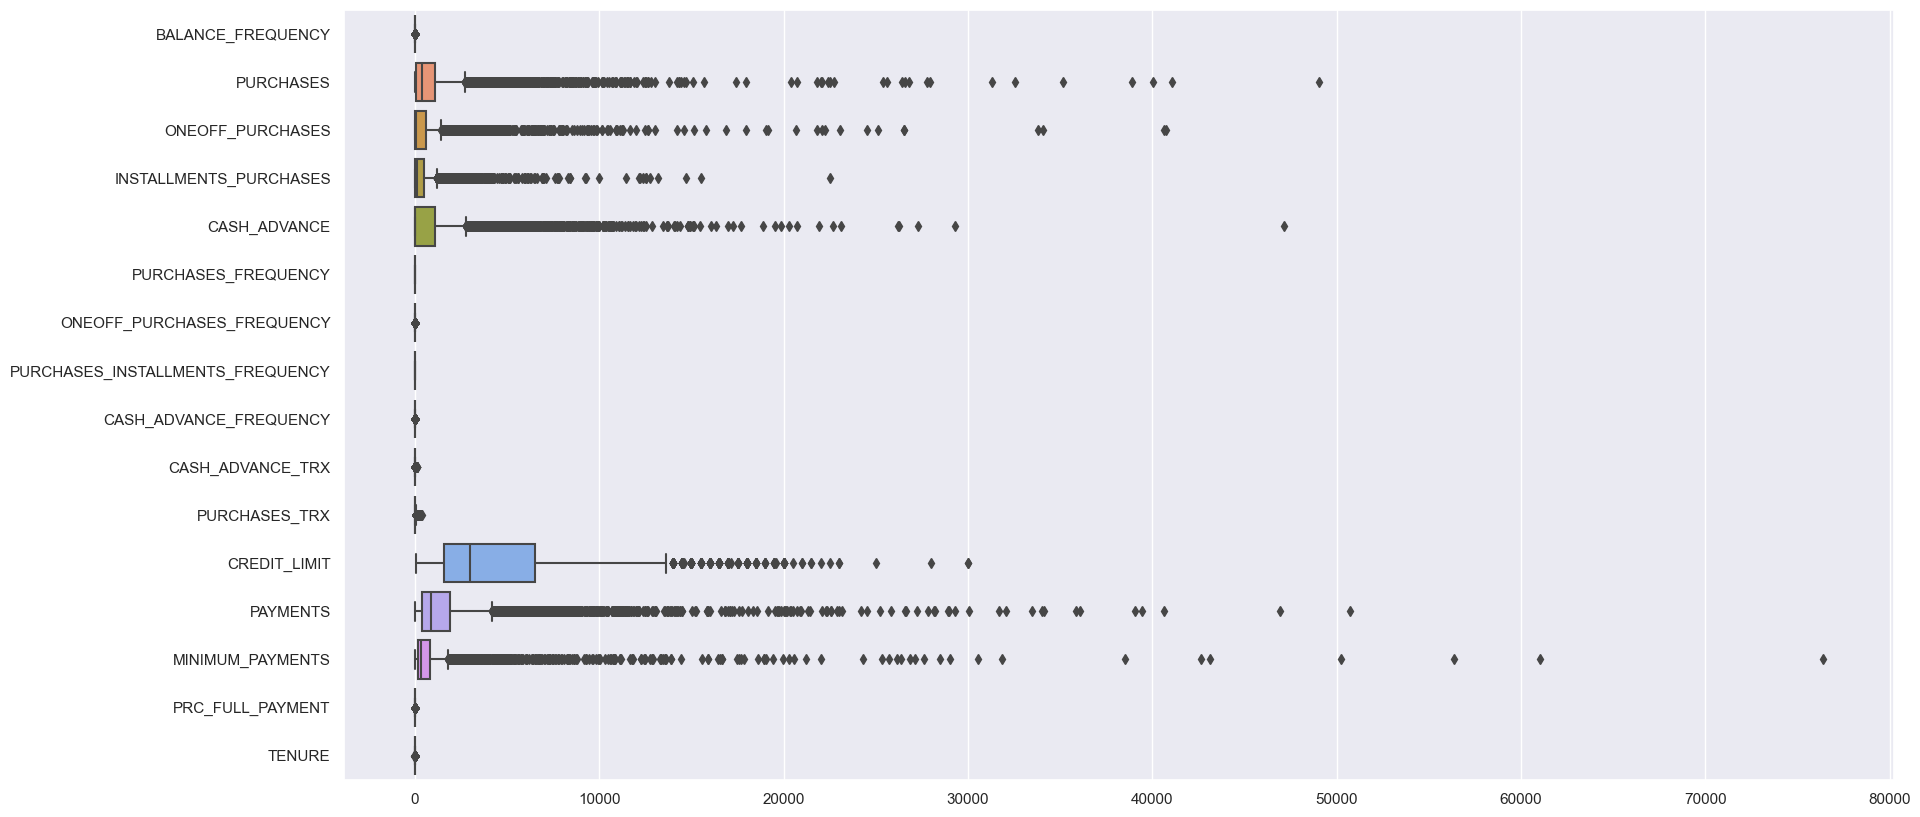

In [201]:
#Visualizacion de todas las variables numericas
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(data=dataframe_alpes, orient="h")

In [202]:
#Separacion de las variables categoricas y numericas
categorical_columns = dataframe_alpes.select_dtypes(include=['object']).columns
numerical_columns = dataframe_alpes.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

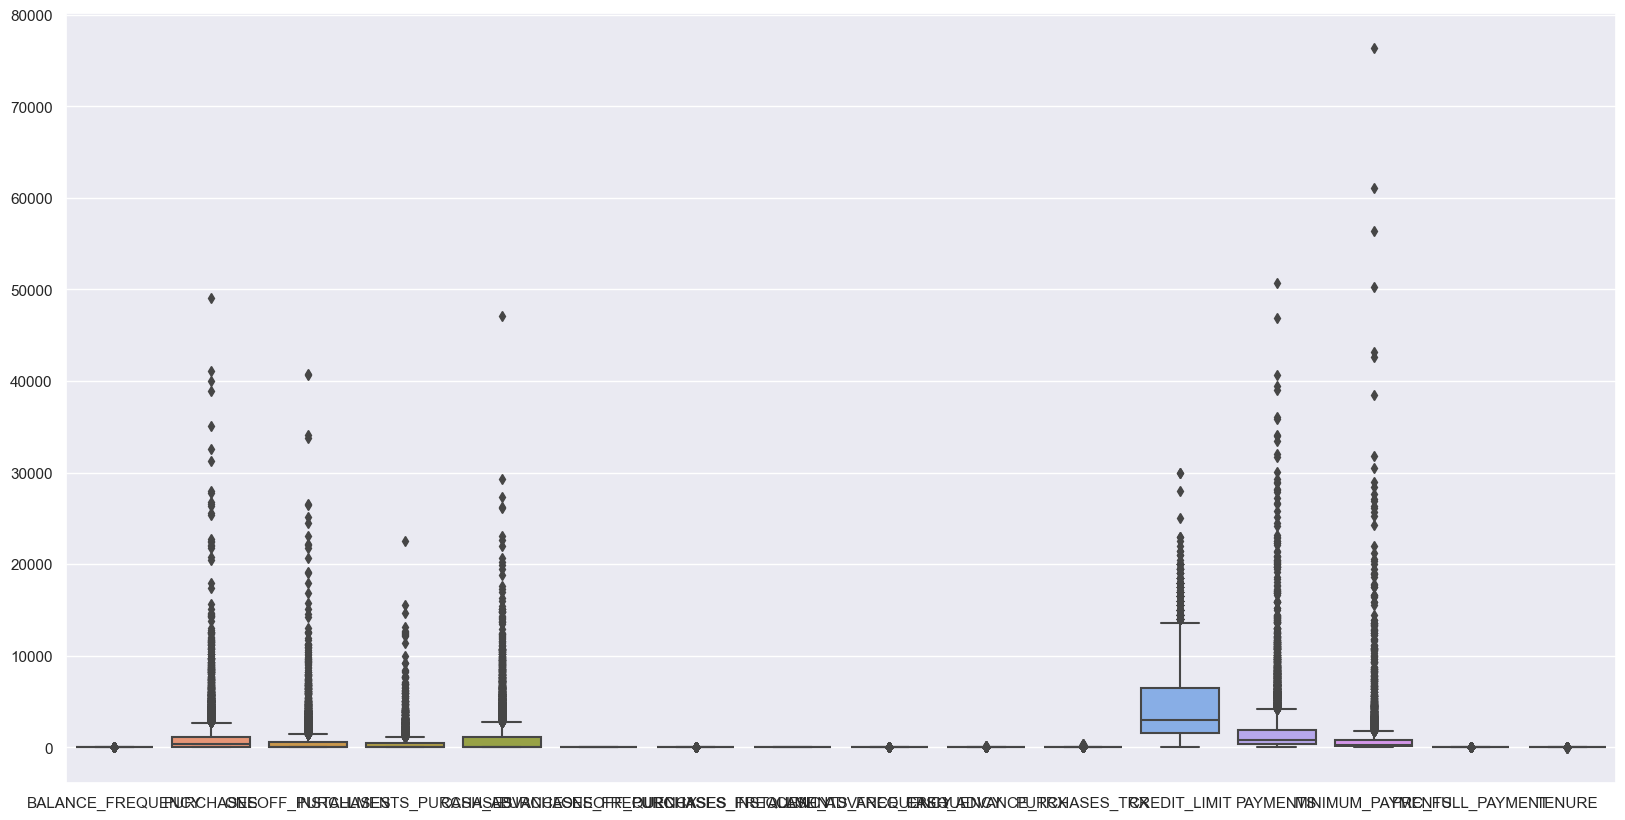

In [203]:
#Visualizacion de las variables numericas de tipo float y entero
fig=plt.figure(figsize=(20,10))
ax=sns.boxplot(data=dataframe_alpes[numerical_columns], orient="v")


In [204]:
#Visualizacion de las variables que no son numericas
name_cols_non_numeric = dataframe_alpes.select_dtypes(include=['object']).columns
name_cols_non_numeric

Index(['CUST_ID', 'BALANCE'], dtype='object')

In [205]:
#Visualizacion de las variables que no son numericas
dataframe_alpes[name_cols_non_numeric].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


In [206]:
#Mostrar datos nulos en las diferentes columnas
Columns=dataframe_alpes.columns
for i in range(0, len(Columns)):
    cantidad_nulos = dataframe_alpes[Columns[i]].isnull().sum()
    print('La columna', Columns[i], 'tiene', cantidad_nulos, 'valores nulos')

    

La columna CUST_ID tiene 0 valores nulos
La columna BALANCE tiene 0 valores nulos
La columna BALANCE_FREQUENCY tiene 0 valores nulos
La columna PURCHASES tiene 0 valores nulos
La columna ONEOFF_PURCHASES tiene 0 valores nulos
La columna INSTALLMENTS_PURCHASES tiene 0 valores nulos
La columna CASH_ADVANCE tiene 10 valores nulos
La columna PURCHASES_FREQUENCY tiene 0 valores nulos
La columna ONEOFF_PURCHASES_FREQUENCY tiene 13 valores nulos
La columna PURCHASES_INSTALLMENTS_FREQUENCY tiene 0 valores nulos
La columna CASH_ADVANCE_FREQUENCY tiene 0 valores nulos
La columna CASH_ADVANCE_TRX tiene 0 valores nulos
La columna PURCHASES_TRX tiene 0 valores nulos
La columna CREDIT_LIMIT tiene 7 valores nulos
La columna PAYMENTS tiene 0 valores nulos
La columna MINIMUM_PAYMENTS tiene 313 valores nulos
La columna PRC_FULL_PAYMENT tiene 0 valores nulos
La columna TENURE tiene 0 valores nulos


c:\app\proyecto django\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


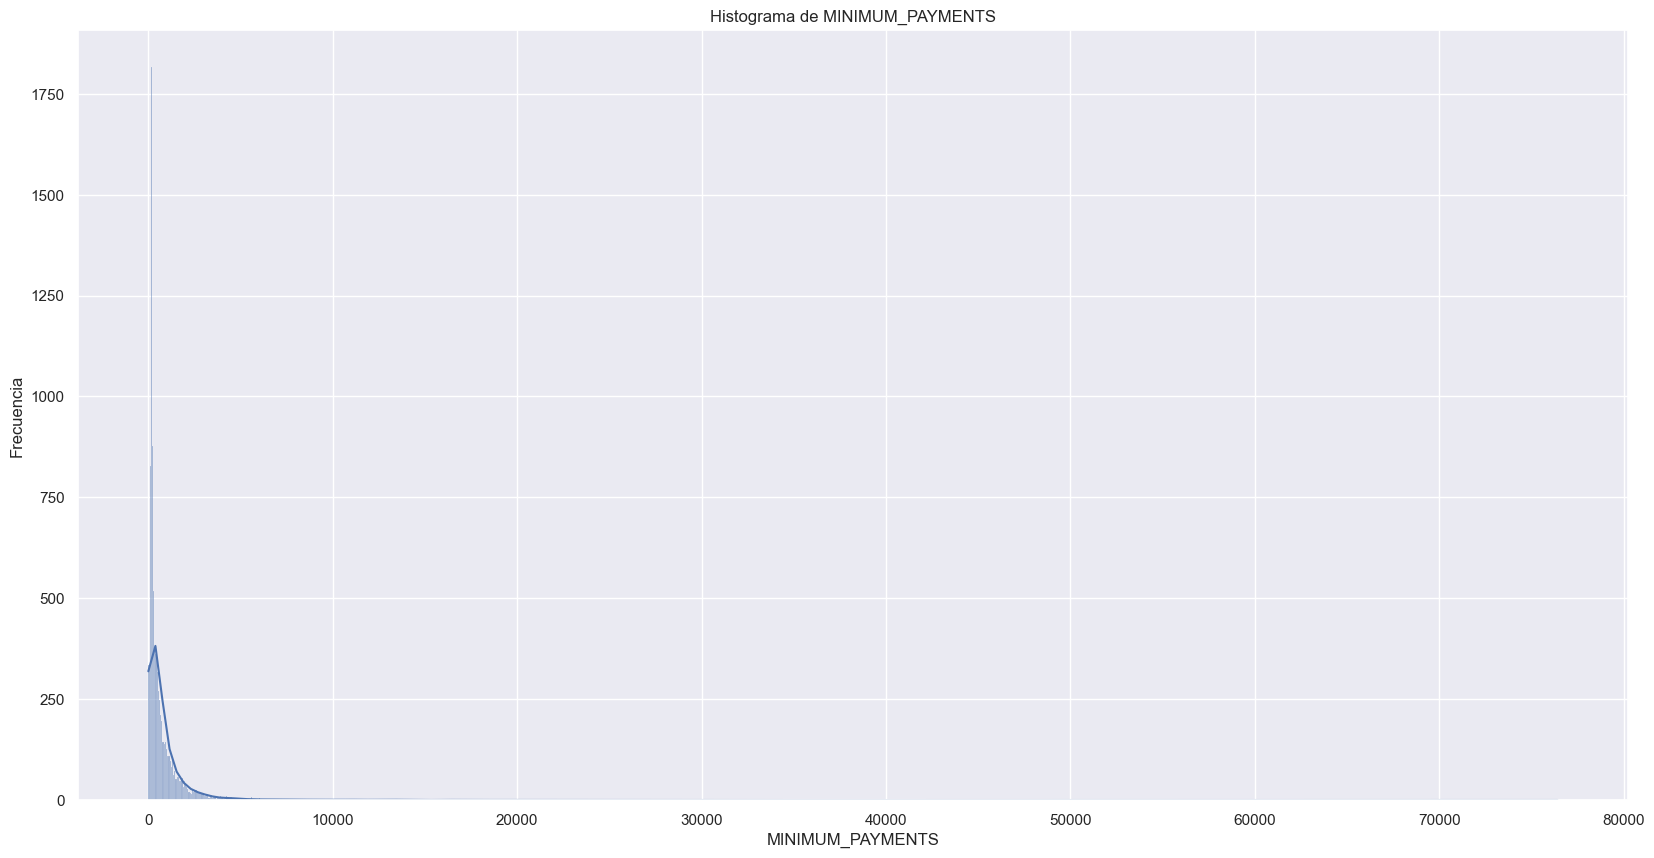

In [207]:
#Hacer un grafico de barras con los datos de MINIMUN_PAYMENTS
fig = plt.figure(figsize=(20,10))
ax = sns.histplot(dataframe_alpes['MINIMUM_PAYMENTS'], kde=True)
ax.set_title('Histograma de MINIMUM_PAYMENTS')
ax.set_xlabel('MINIMUM_PAYMENTS')
ax.set_ylabel('Frecuencia')
plt.show()

In [208]:
#Mostrar regisrros duplicados
duplicated = dataframe_alpes.duplicated()
duplicated
#Eliminar registros duplicados
dataframe_alpes = dataframe_alpes.drop_duplicates()
dataframe_alpes.shape


(8950, 18)

In [209]:
numerical_columns = dataframe_alpes.select_dtypes(include=['float64', 'int64']).columns
for i in range(0, len(numerical_columns)):
    cantidad_negativos=(dataframe_alpes[numerical_columns[i]]<0).sum()
    print('La columna', numerical_columns[i], 'tiene', cantidad_negativos, 'valores negativos')

La columna BALANCE_FREQUENCY tiene 0 valores negativos
La columna PURCHASES tiene 0 valores negativos
La columna ONEOFF_PURCHASES tiene 0 valores negativos
La columna INSTALLMENTS_PURCHASES tiene 0 valores negativos
La columna CASH_ADVANCE tiene 0 valores negativos
La columna PURCHASES_FREQUENCY tiene 0 valores negativos
La columna ONEOFF_PURCHASES_FREQUENCY tiene 7 valores negativos
La columna PURCHASES_INSTALLMENTS_FREQUENCY tiene 0 valores negativos
La columna CASH_ADVANCE_FREQUENCY tiene 0 valores negativos
La columna CASH_ADVANCE_TRX tiene 0 valores negativos
La columna PURCHASES_TRX tiene 0 valores negativos
La columna CREDIT_LIMIT tiene 0 valores negativos
La columna PAYMENTS tiene 0 valores negativos
La columna MINIMUM_PAYMENTS tiene 0 valores negativos
La columna PRC_FULL_PAYMENT tiene 0 valores negativos
La columna TENURE tiene 4 valores negativos


In [210]:
dataframe_alpes.dtypes

CUST_ID                              object
BALANCE                              object
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

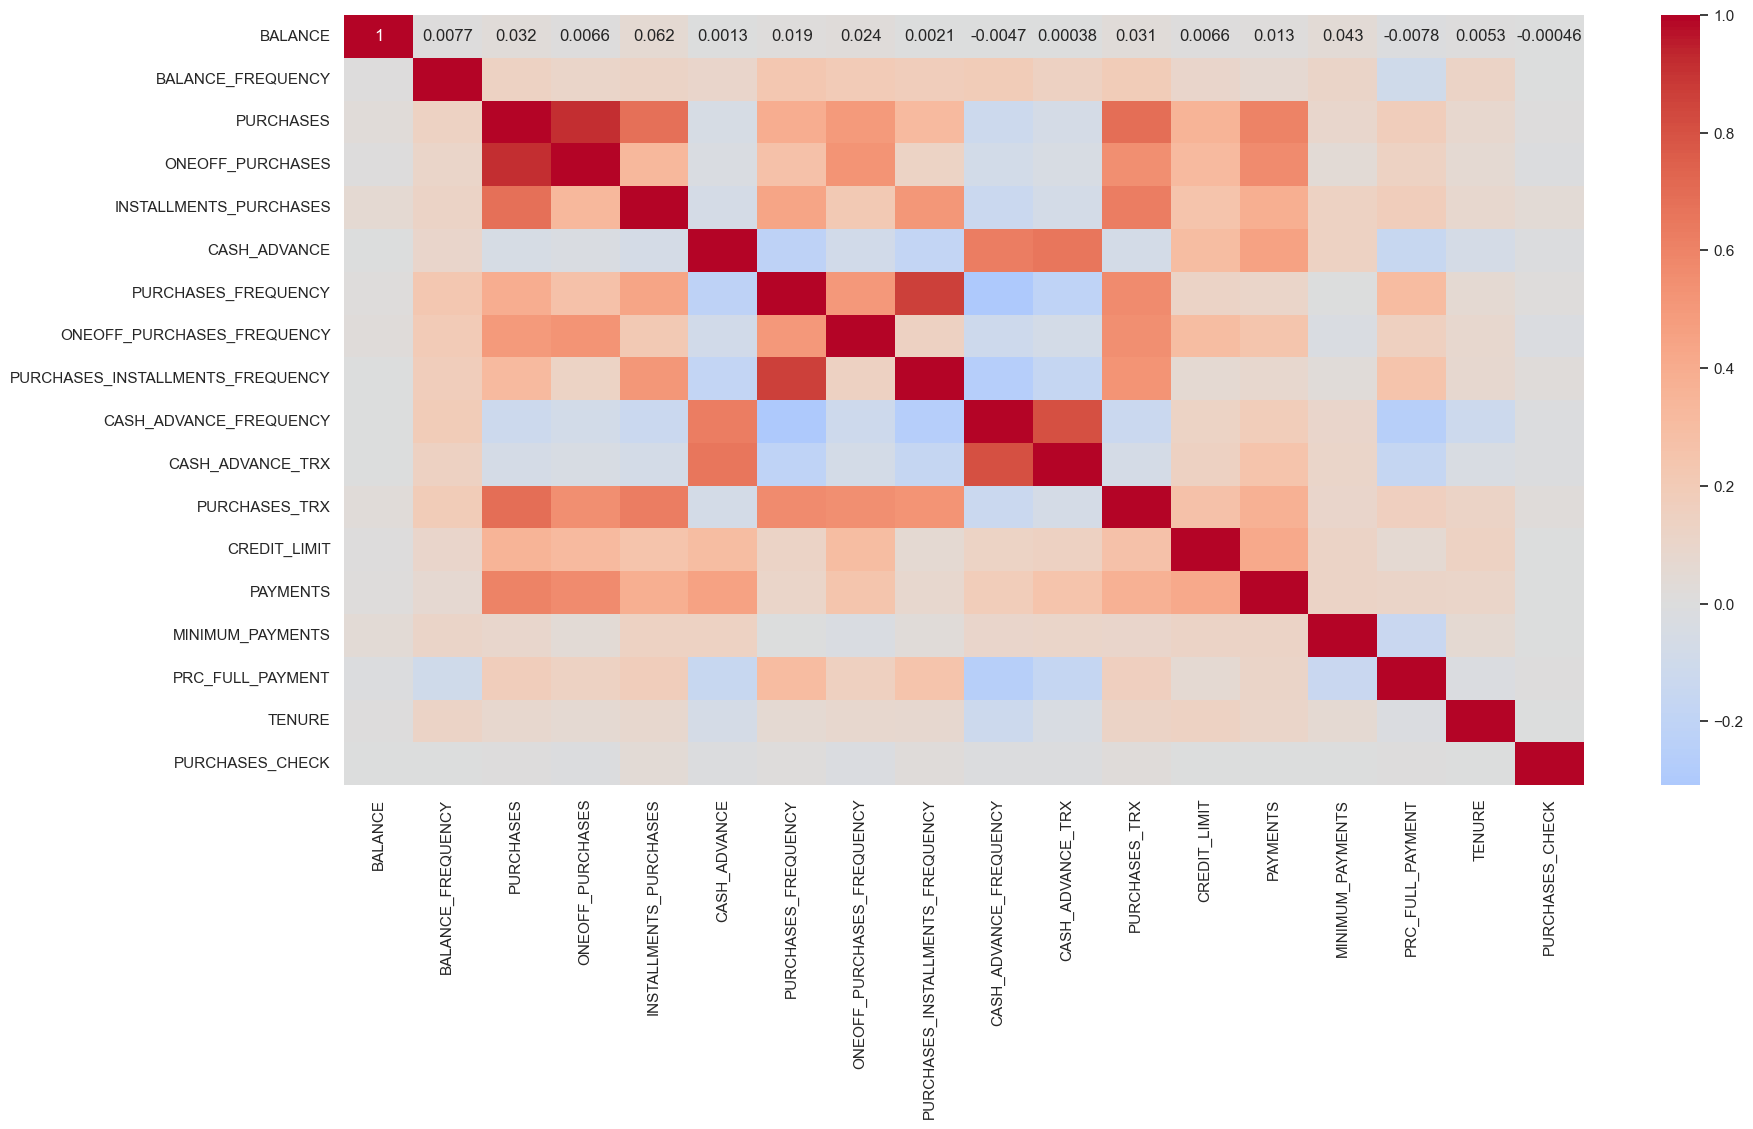

In [239]:
#Grafica de correlacion con 2 colores, donde azules son correlaciones positivas y rojas negativas
Columnsnumeric=dataframe_alpes.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataframe_alpes[Columnsnumeric].corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,)
plt.show()


C:\Users\Equipo\AppData\Local\Temp\ipykernel_28636\599599497.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataframe_alpes[Columnsnumeric].hist(ax=ax)


array([[<Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>,
        <Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>],
       [<Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>],
       [<Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>,
        <Axes: title={'center': 'TENURE'}>]], dtype=object)

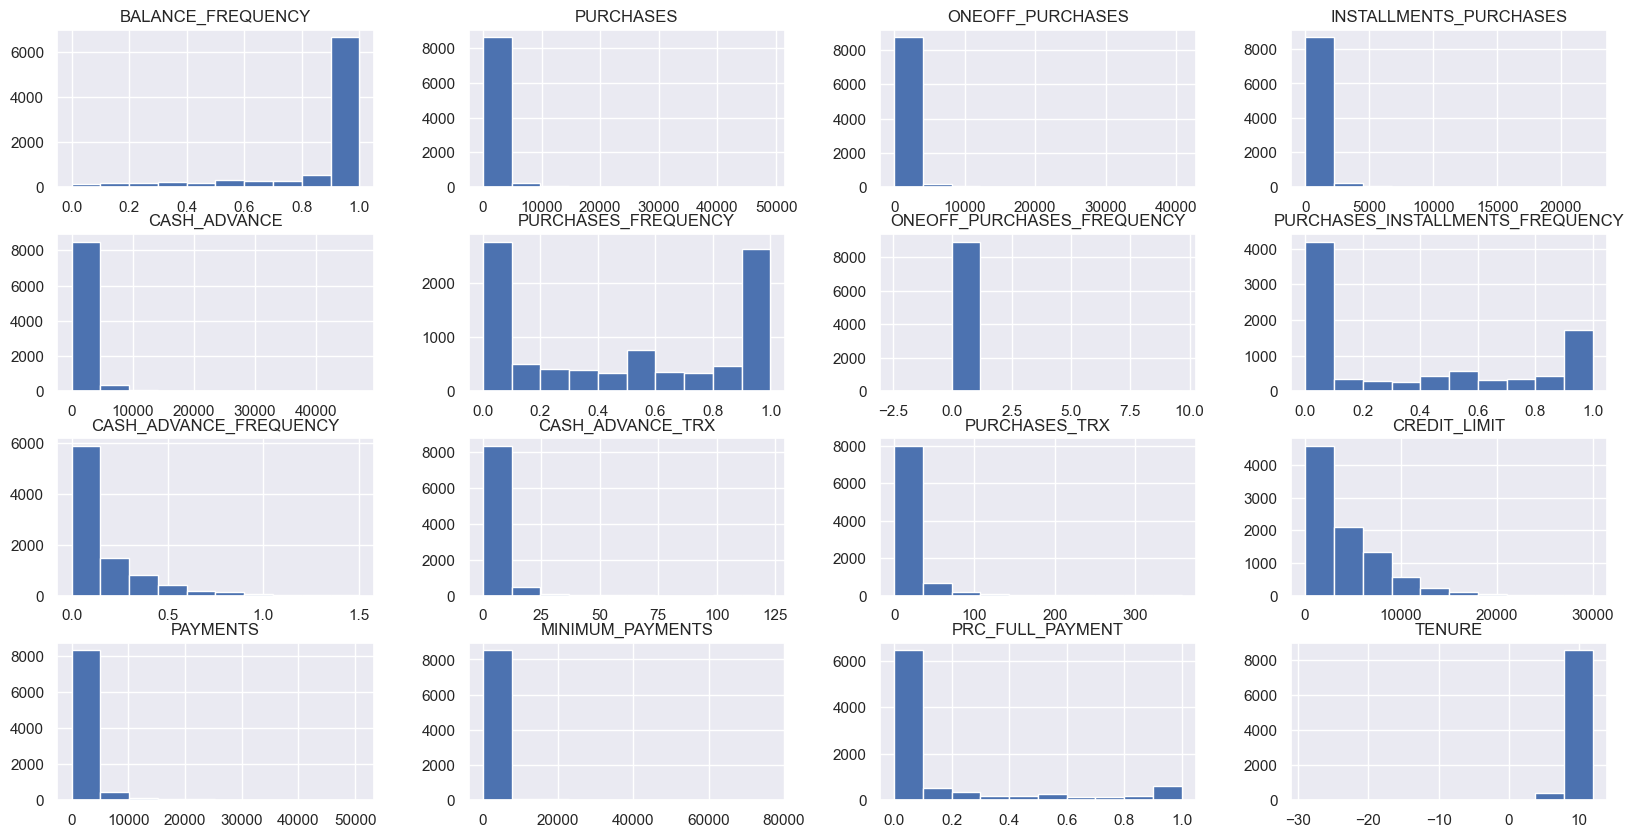

In [212]:
#Histograma de las variables numericas
fig=plt.figure(figsize=(20,10))
ax = fig.gca()
dataframe_alpes[Columnsnumeric].hist(ax=ax)


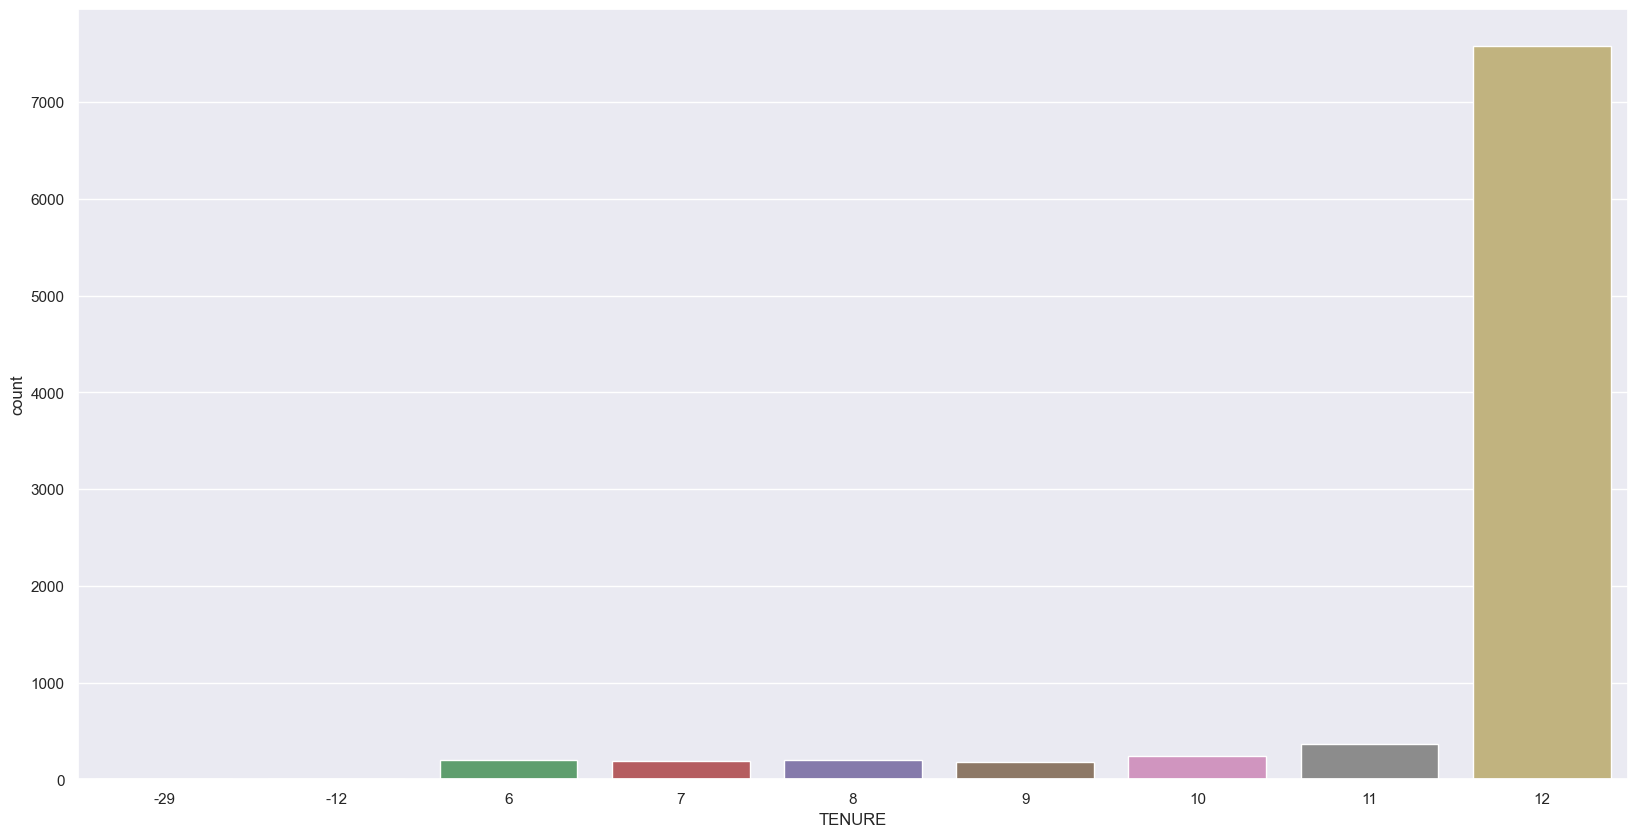

In [213]:
fig=plt.figure(figsize=(20,10))
ax=sns.countplot(x='TENURE', data=dataframe_alpes)

In [214]:
#Grafica de barras de min payment vs 

Analisis de la calidad de los datos

In [215]:
#Completitud de los datos
#Se observa que no hay datos nulos en ninguna columna
((dataframe_alpes.isnull().sum()/len(dataframe_alpes))*100).sort_values(ascending=False)

MINIMUM_PAYMENTS                    3.497207
ONEOFF_PURCHASES_FREQUENCY          0.145251
CASH_ADVANCE                        0.111732
CREDIT_LIMIT                        0.078212
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

In [216]:
#Calcular unicidad de los datos
#Se observa que no hay datos duplicados
dataframe_alpes.duplicated(keep=False).sum()

0

In [217]:
#Consistencia de los datos
dataframe_alpes.MINIMUM_PAYMENTS.value_counts()

MINIMUM_PAYMENTS
299.351881     2
139.509787     1
150.317143     1
271.528169     1
6404.855484    1
              ..
711.894455     1
256.522546     1
127.799107     1
637.350978     1
88.288956      1
Name: count, Length: 8636, dtype: int64

LIMPIEZA DE DATOS

In [218]:
#Linpieza de Balance: Debido a que esta columna esta como tipo texto y tiene elementos que tienes caracteres de lenguaje
# Eliminar filas basadas en un valor en una columna específica
valores_a_eliminar = [':',';','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for valor in valores_a_eliminar:
    dataframe_alpes = dataframe_alpes[~dataframe_alpes['BALANCE'].astype(str).str.contains(valor)]
# Convertir la columna a tipo float
dataframe_alpes['BALANCE'] = dataframe_alpes['BALANCE'].astype(float)
# Mostrar el DataFrame resultante
print(dataframe_alpes)


     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [219]:
#Eliminar los registros que tengan valores negativos en la columna TENURE
dataframe_alpes = dataframe_alpes[dataframe_alpes['TENURE'] > 0]
# Mostrar el DataFrame resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [220]:
#Eliminar los registros nulos en la columna MINIMUM_PAYMENTS
dataframe_alpes.loc[(dataframe_alpes['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataframe_alpes['MINIMUM_PAYMENTS'].mean()
dataframe_alpes.loc[(dataframe_alpes['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataframe_alpes['CREDIT_LIMIT'].mean()

In [221]:
#Eliminar los datos negativos en la columna ONEOFF_PURCHASES_FREQUENCY
dataframe_alpes = dataframe_alpes[dataframe_alpes['ONEOFF_PURCHASES_FREQUENCY'] >= 0]
# Mostrar el DataFrame resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [222]:
#Eliminar datos nulos de CREDIT_LIMIT 
dataframe_alpes = dataframe_alpes.dropna(subset=['CREDIT_LIMIT'])
#Eliminar datos nulos de CASH_ADVANCE
dataframe_alpes = dataframe_alpes.dropna(subset=['CASH_ADVANCE'])
#mostrar el dataframe resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [223]:
#Comprobar que la suma de las colunmas ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES sea igual a la columna PURCHASES,si n
dataframe_alpes['PURCHASES_CHECK'] = dataframe_alpes['ONEOFF_PURCHASES'] + dataframe_alpes['INSTALLMENTS_PURCHASES']
dataframe_alpes['PURCHASES_CHECK'] = dataframe_alpes['PURCHASES_CHECK'] - dataframe_alpes['PURCHASES']
print(dataframe_alpes['PURCHASES_CHECK'])


0       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
8956    0.0
8957    0.0
8958    0.0
8959    0.0
8960    0.0
Name: PURCHASES_CHECK, Length: 8910, dtype: float64


In [224]:
#Eliminarlas filasque tengan valores nulos en la columna CREDIT_LIMIT
dataframe_alpes = dataframe_alpes.dropna(subset=['CREDIT_LIMIT'])
# Mostrar el DataFrame resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [225]:
#Eliminar las filas que tengan valores superiores a 1 en la columna CASH_ADVANCE_FREQUENCY
dataframe_alpes = dataframe_alpes[dataframe_alpes['CASH_ADVANCE_FREQUENCY'] <= 1]
# Mostrar el DataFrame resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [226]:
#Eliminar las filas que tengan valores fuera del rango de 0 a 1 en la columna ONEOFF_PURCHASES_FREQUENCY
dataframe_alpes = dataframe_alpes[(dataframe_alpes['ONEOFF_PURCHASES_FREQUENCY'] >= 0) & (dataframe_alpes['ONEOFF_PURCHASES_FREQUENCY'] <= 1)]
# Mostrar el DataFrame resultante
print(dataframe_alpes)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8956  C19186    28.493517           1.000000     291.12              0.00   
8957  C19187    19.183215           1.000000     300.00              0.00   
8958  C19188    23.398673           0.833333     144.40              0.00   
8959  C19189    13.457564           0.833333       0.00              0.00   
8960  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [227]:
#Eliminar la columna de CUST_ID
dataframe_alpes = dataframe_alpes.drop(columns=['CUST_ID'])
# Mostrar el DataFrame resultante
print(dataframe_alpes)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8956    28.493517           1.000000     291.12              0.00   
8957    19.183215           1.000000     300.00              0.00   
8958    23.398673           0.833333     144.40              0.00   
8959    13.457564           0.833333       0.00              0.00   
8960   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
2                       0.00      0.0

IMPLEMENTACION DE DBSCAN

In [228]:
#Traer librerias necesarias
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

Se eligieron las columnas de mayor relevancia:
 * Balance: Se elije esta columna debido a que  esta nos informa el saldo promedio de la cuenta que es util para saber el manejo financiero de la persona y si la cuenta es estable
 * PURCHASES, ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES:Estas columnas proporcionan información detallada sobre los patrones de compra del titular de la tarjeta. Analizar estas columnas puede revelar qué tipo de compras realiza el cliente.
 * CASH_ADVANCE:Proporciona información sobre el uso de adelantos de efectivo. Puede ser importante para entender la necesidad de liquidez inmediata del titular de la tarjeta.
 * CREDIT_LIMIT: Indica el límite de crédito del titular. Puede ser relevante para analizar si los clientes están utilizando cerca de su límite de crédito o si hay margen para más gastos.
 * PAYMENTS: Indica el total de pagos realizados por el cliente. Puede ser crucial para evaluar la capacidad de pago y la gestión financiera del titular de la tarjeta.
 * TENURE: Número de meses como cliente. Podría ser relevante para entender la lealtad del cliente y cómo cambian los comportamientos a lo largo del tiempo.
 * MINIMUN_PAYMENTS: Se elige esta columna debido a que puede ser relevante para mirar los gastos de la cuenta y relacionar el comportamiento de la misma


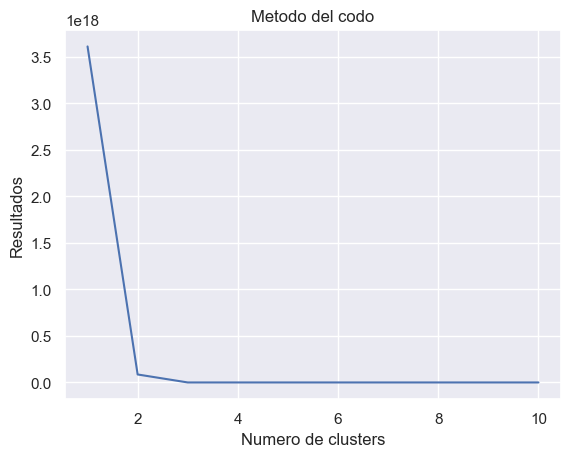

In [229]:
#Implementacion del metodo del codo para determinar el numero de clusters
columnasRelevantes=dataframe_alpes[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]
#Normalizar los datos
Resultados=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(columnasRelevantes)
    Resultados.append(kmeans.inertia_)
plt.plot(range(1, 11), Resultados)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Resultados')
plt.show()


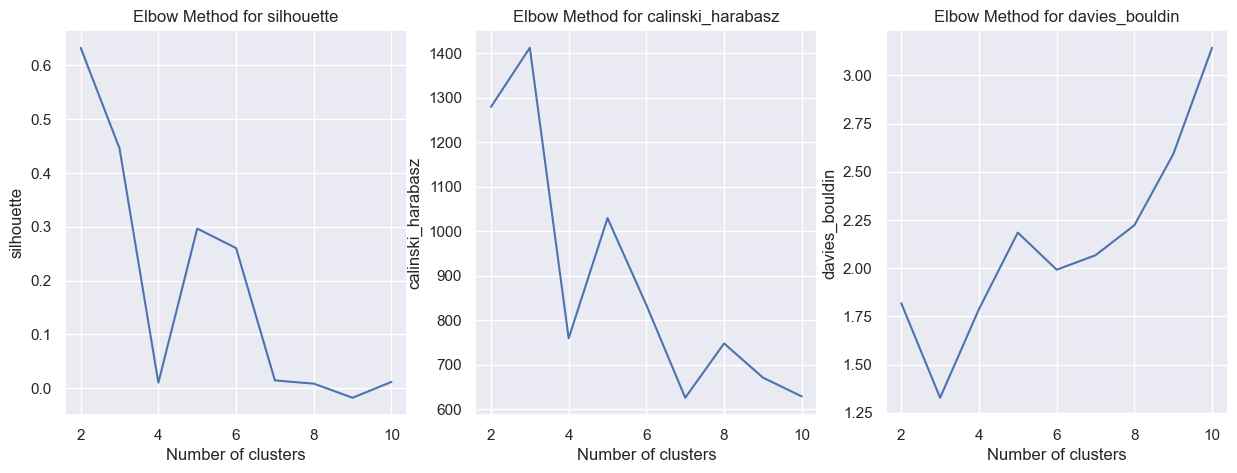

In [247]:
#PARAMETRIZACION DE DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (columnasRelevantes)
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    GMM = GaussianMixture (n_components = k , random_state = 1)
    GMM.fit (scaled_features)
    
    score = silhouette_score (scaled_features , GMM.predict(scaled_features))
    silhouette.append (score)
    
    score1 = calinski_harabasz_score (scaled_features, GMM.predict(scaled_features))
    calinski_harabasz.append(score1)
    
    score2 = davies_bouldin_score (scaled_features, GMM.predict(scaled_features))
    davies_bouldin.append (score2)

#Graficar los resultados
metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(metrics):
    ax[i].plot(range(2, 11), metrics[metric])
    ax[i].set_xlabel('Number of clusters')
    ax[i].set_ylabel(metric)
    ax[i].set_title(f'Elbow Method for {metric}')
plt.show()






In [249]:
silhouette=[]
eps_values=[]
min_samples_values=[]
calinski_harabasz=[]
for eps in np.arange(1.0, 2.1, 0.1):
    for min_samples in range(2, 11):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_features)
        eps_values.append(eps)
        min_samples_values.append(min_samples)
        score = silhouette_score (scaled_features , dbscan.fit_predict(scaled_features))
        silhouette.append (score)
        score1 = calinski_harabasz_score (scaled_features, dbscan.fit_predict(scaled_features))
        calinski_harabasz.append(score1)

#Unir los resultados en un dataframe
df = pd.DataFrame({'eps': eps_values, 'min_samples': min_samples_values, 'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz})
print(df)

    eps  min_samples  silhouette  calinski_harabasz
0   1.0            2    0.046441          46.284772
1   1.0            3    0.257596         166.803930
2   1.0            4    0.570185         393.978660
3   1.0            5    0.641207         756.775229
4   1.0            6    0.409799         481.380477
..  ...          ...         ...                ...
94  2.0            6    0.797137        1302.000082
95  2.0            7    0.795415        1294.790375
96  2.0            8    0.790212        1297.761458
97  2.0            9    0.783749        1310.289703
98  2.0           10    0.782220        1320.155384

[99 rows x 4 columns]


In [250]:
#Hallar los valores de eps y min_samples que maximizan el silhouette
max_silhouette = df['silhouette'].max()
best_params = df[df['silhouette'] == max_silhouette]
print(best_params)

    eps  min_samples  silhouette  calinski_harabasz
93  2.0            5     0.80093        1267.005528


In [251]:
#Hallar los valores de eps y min_samples que maximizan el calinski_harabasz
max_calinski_harabasz = df['calinski_harabasz'].max()
best_params_calinski_harabasz = df[df['calinski_harabasz'] == max_calinski_harabasz]
print(best_params_calinski_harabasz)

    eps  min_samples  silhouette  calinski_harabasz
71  1.7           10     0.74579        1519.534307


#Se decide que el epsilon para la implementacion de DBSCAN va a ser 2.0 con un minimo de relacion de 5, debido a que consideramos que la medicion de la silueta es mejor que calinski_harabasz

[-1]


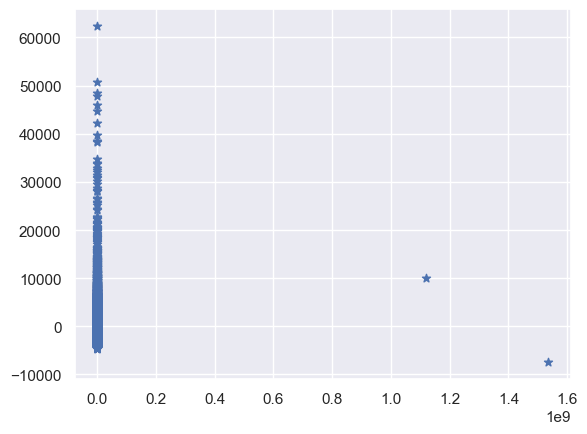

In [232]:

from sklearn.decomposition import PCA
#SE va
dbscan=DBSCAN(eps=3, min_samples=5).fit(dataframe_alpes)
labels=dbscan.labels_
print(np.unique(labels))
#GRafica de los clusters
pca=PCA(n_components=3).fit(dataframe_alpes)
pca_2d=pca.transform(dataframe_alpes)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif dbscan.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif dbscan.labels_[i]==-1:
        c3=plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')


C:\Users\Equipo\AppData\Local\Temp\ipykernel_28636\3817567131.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=cm.get_cmap('rainbow', 10))


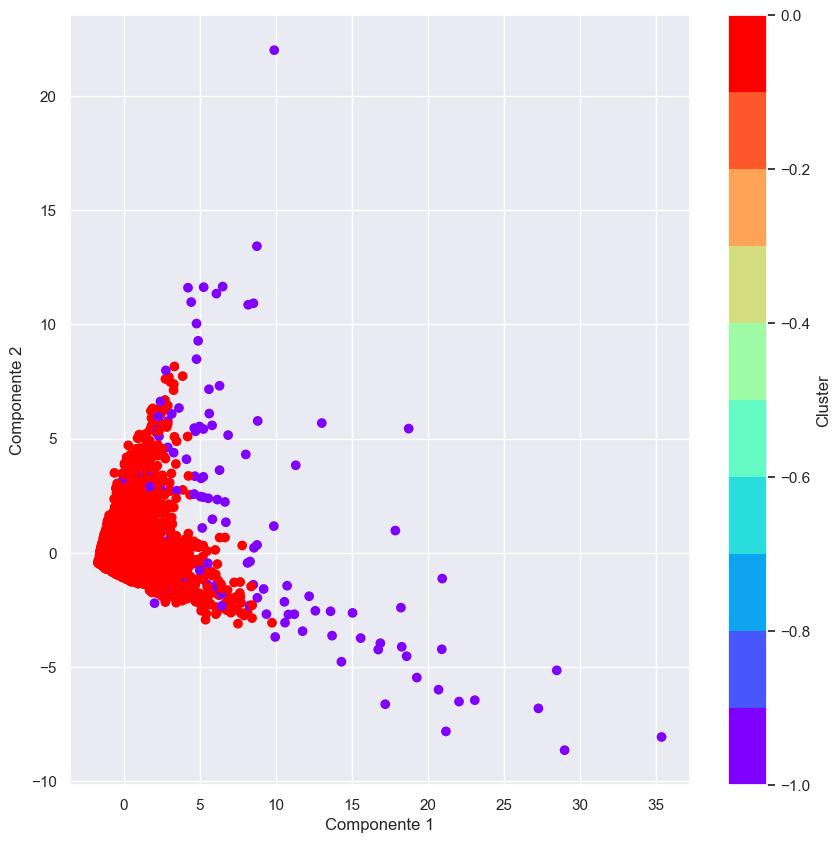

In [233]:
#HACER EL DBSCAN PARA TODAS LAS COLUMNAS IMPORTANTES
datafrane_grafica = dataframe_alpes[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]
dataframe_alpesFINAL=StandardScaler().fit_transform(datafrane_grafica)
#Se aplica el algoritmo de DBSCAN
dbscan=DBSCAN(  eps=2, min_samples=5)
clusters=dbscan.fit_predict(dataframe_alpesFINAL)
#Se grafican los clusters
pca=PCA(n_components=3).fit(dataframe_alpesFINAL)
X_pca=pca.transform(dataframe_alpesFINAL)
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=cm.get_cmap('rainbow', 10))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()                          

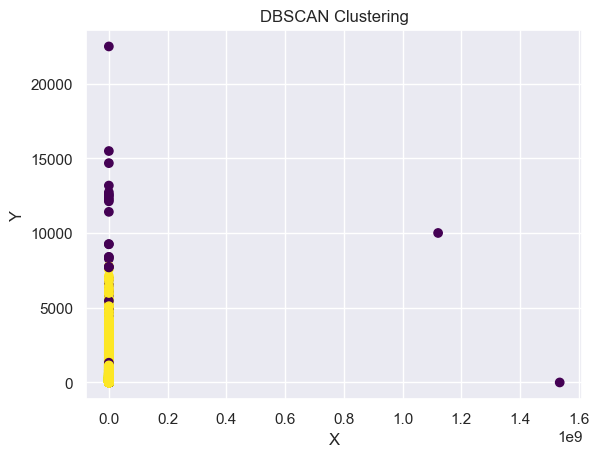

In [234]:
#IMPLEMENTAR DBSCAN PARA LA COLUMNA BALANCE Y PURCHASES
#Implemenar DBSCAN para todas las columnas
dataframe_grafica = dataframe_alpes[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]
dataframe_alpesFINAL=StandardScaler().fit_transform(dataframe_grafica)
dbscan=DBSCAN(eps=2, min_samples=5)
clusters=dbscan.fit_predict(dataframe_alpesFINAL)
plt.scatter(dataframe_grafica['BALANCE'],dataframe_grafica['INSTALLMENTS_PURCHASES'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



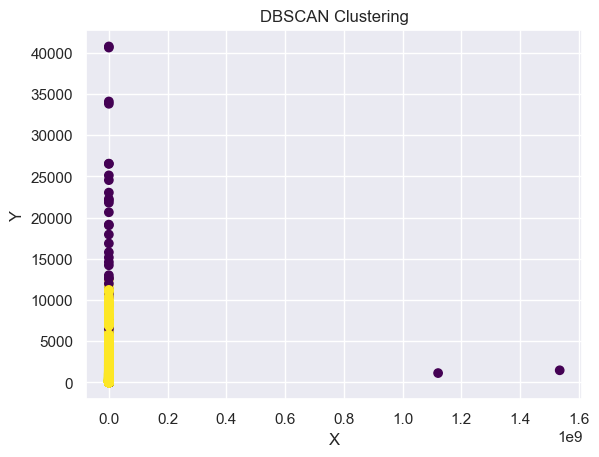

In [235]:
#IMPLEMENTAR DBSCAN PARA LA COLUMNA BALANCE Y ONEOFF_PURCHASES
#Implemenar DBSCAN para todas las columnas
dataframe_grafica = dataframe_alpes[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]
dataframe_alpesFINAL=StandardScaler().fit_transform(dataframe_grafica)
dbscan=DBSCAN(eps=2, min_samples=5)
clusters=dbscan.fit_predict(dataframe_alpesFINAL)
plt.scatter(dataframe_grafica['BALANCE'],dataframe_grafica['ONEOFF_PURCHASES'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

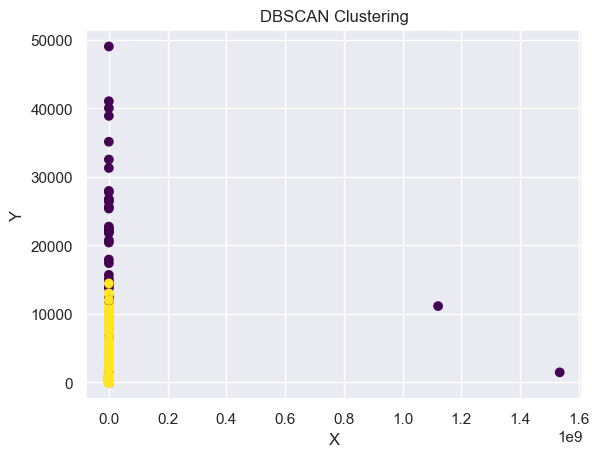

In [236]:
#Implemenar DBSCAN para todas las columnas
dataframe_grafica = dataframe_alpes[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]
dataframe_alpesFINAL=StandardScaler().fit_transform(dataframe_grafica)
dbscan=DBSCAN(eps=2, min_samples=5)
clusters=dbscan.fit_predict(dataframe_alpesFINAL)
plt.scatter(dataframe_grafica['BALANCE'],dataframe_grafica['PURCHASES'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [258]:
#Se muestran todas las graficas de dispersión de todas las columna contra todas las columnas usando DBSCAN
DBV = dataframe_grafica.copy ()
DB = DBSCAN (eps = 2 , min_samples = 5)
DB.fit (scaled_features)
DBV ['cluster'] = DB.fit_predict (scaled_features)

def plot3 (data24):
    columns_to_plot = ['BALANCE','PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT' ,
                   'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
    plt.rcParams['figure.facecolor'] = 'lightgrey'
    plt.style.use("bmh")
    sns.pairplot(data24 [columns_to_plot],  hue='cluster', corner=True)

c:\app\proyecto django\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\app\proyecto django\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\app\proyecto django\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\app\proyecto django\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

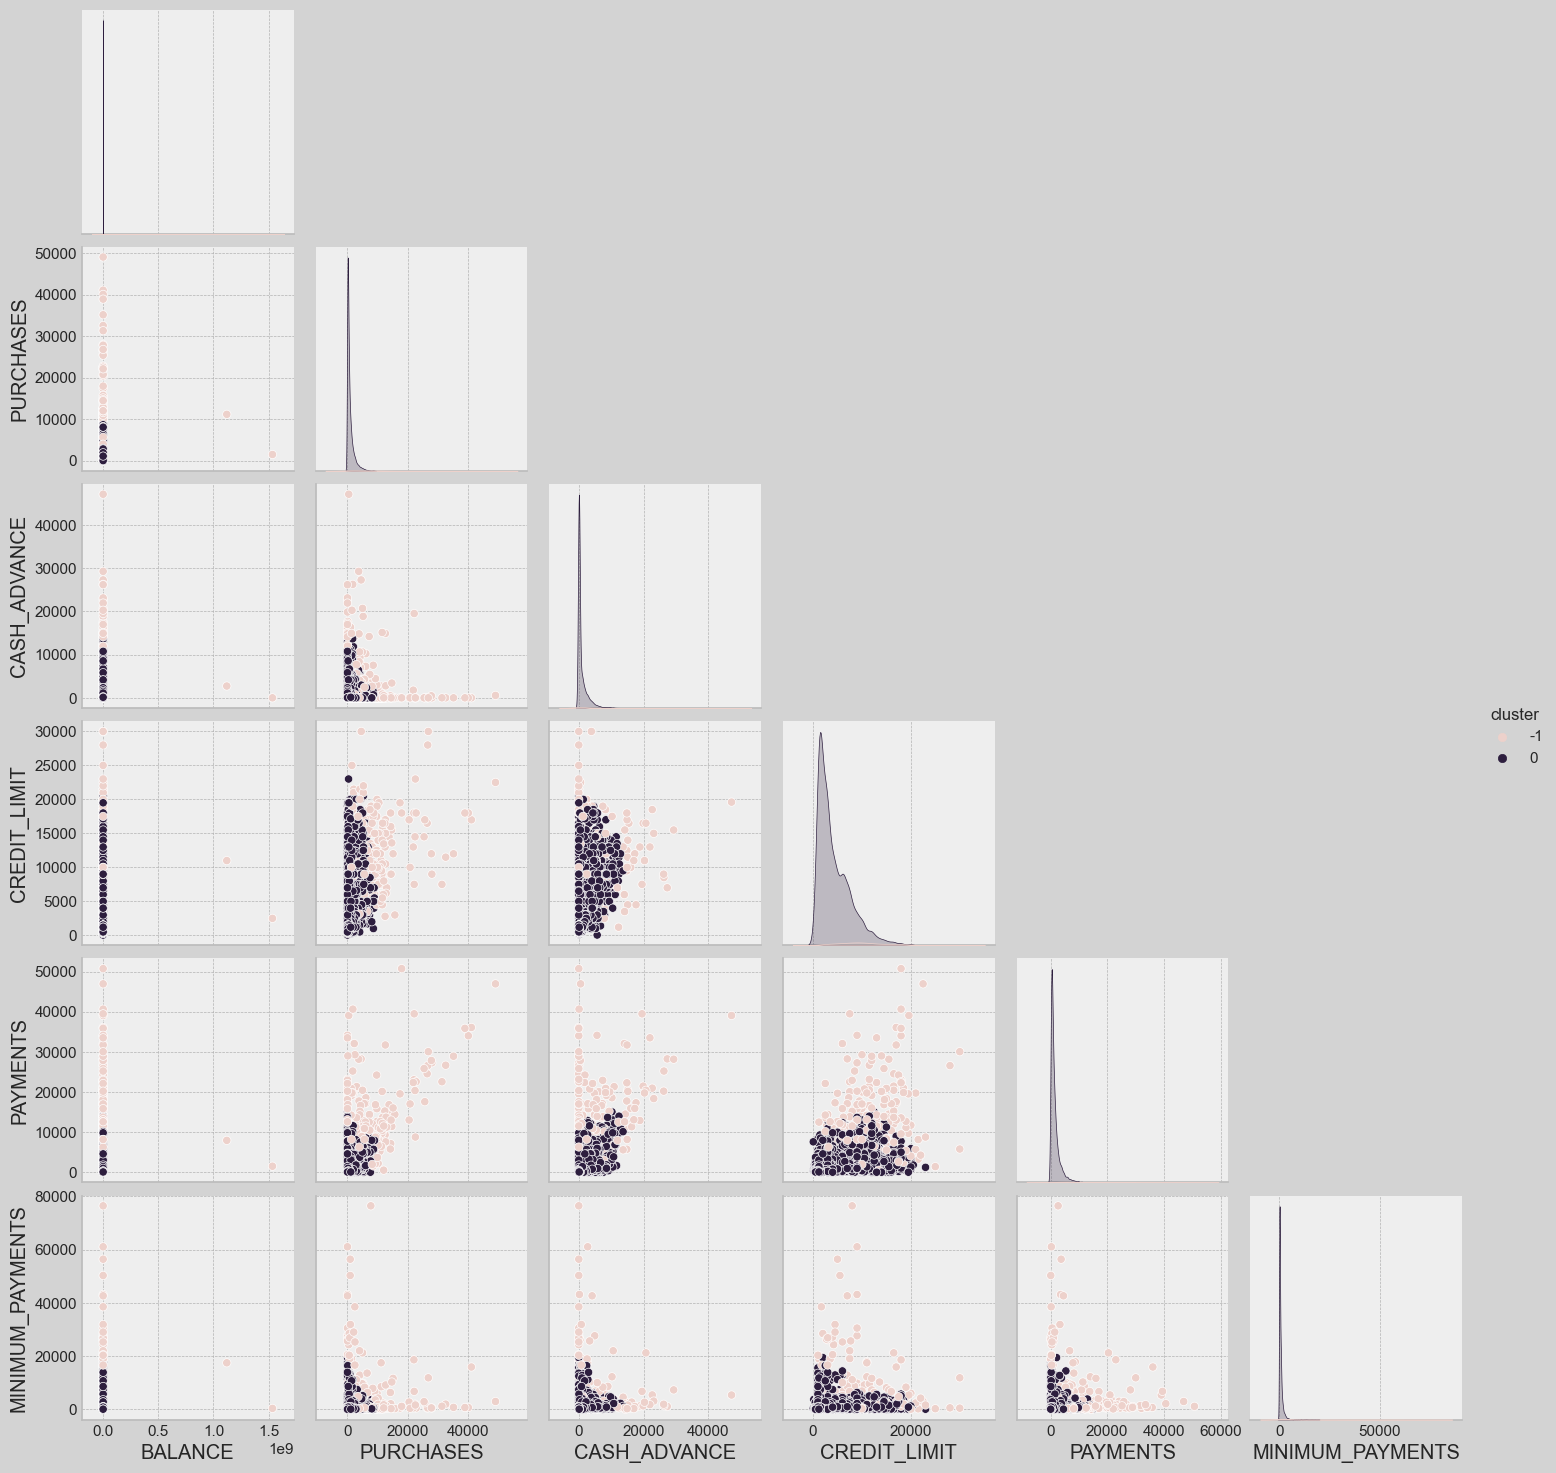

In [257]:
plot3 (DBV)

In [237]:
#Implementar el coeficiente de silueta para determinar el modelo de DBSCAN
from sklearn.metrics import silhouette_score
silhouette_score(dataframe_alpesFINAL, clusters)



0.8009295879007038

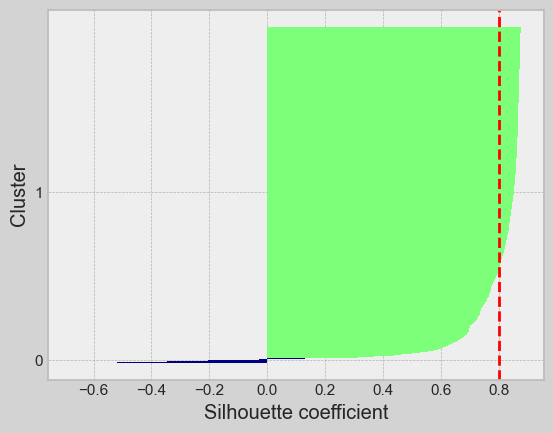

In [259]:
#implementar el grafico de silueta
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np
cluster_labels = np.unique(clusters)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataframe_alpesFINAL, clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()